In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import shap
#from shap.plots import *
df = pd.read_csv('train.csv')

new = df[['SalePrice','LotArea', 'OverallQual','LotArea' ,'OverallCond', 
          'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','GrLivArea','BedroomAbvGr',
          'HalfBath','FullBath','GarageArea', 'MoSold', 'YrSold', '1stFlrSF', 
          '2ndFlrSF', 'PoolArea', 'MSSubClass']].copy()

new = new.dropna() ## drops the NULL rows


X = new.drop(columns = 'SalePrice') #Training features


y= new['SalePrice'] #Sale price

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
lr = LinearRegression()
model = lr.fit(X_train,y_train)

c = lr.intercept_
m = lr.coef_
y_pred_train = lr.predict(X_train)
a= lr.predict(X_test)
feature_coef = {}
for x in range(lr.n_features_in_):

  name = lr.feature_names_in_[x]
  coef = lr.coef_[x]
  
  feature_coef[name] = coef
  
# sort the dictionnary higher to lower coef
feature_coef_sorted = sorted(feature_coef.items(), key=lambda x:x[1], reverse = True)
print("############## COEF VALUES WHEN USING LINEAR REGRESSION ALGORITHM ##############")
print(*feature_coef_sorted, sep="\n")
##r2_score(y_train, y_pred_train)


explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)
#shap.plots.bar(shap_values)

#shap.initjs()
#shap.plots.force(shap_values[0])

############## COEF VALUES WHEN USING LINEAR REGRESSION ALGORITHM ##############
('OverallQual', 16676.427870974385)
('OverallCond', 5414.3375327249305)
('HalfBath', 752.9814275412979)
('YearBuilt', 427.8286261855512)
('YearRemodAdd', 136.10221017905292)
('GrLivArea', 52.1161410235567)
('GarageArea', 35.99594870923633)
('TotalBsmtSF', 28.012183290529848)
('PoolArea', 23.67491414708339)
('1stFlrSF', 17.732618249753017)
('2ndFlrSF', 17.444728907120712)
('LotArea', 0.30707299873728544)
('MSSubClass', -161.49944699053486)
('MoSold', -355.01696939393827)
('YrSold', -507.64779078040584)
('FullBath', -1554.0291312735337)
('BedroomAbvGr', -9224.46245310867)


Permutation explainer: 1461it [00:22, 36.04it/s]                          


Overall we can see by this printed out list the the OverallQual and OverAllcond seems to dominate the influence over the house pricing. 

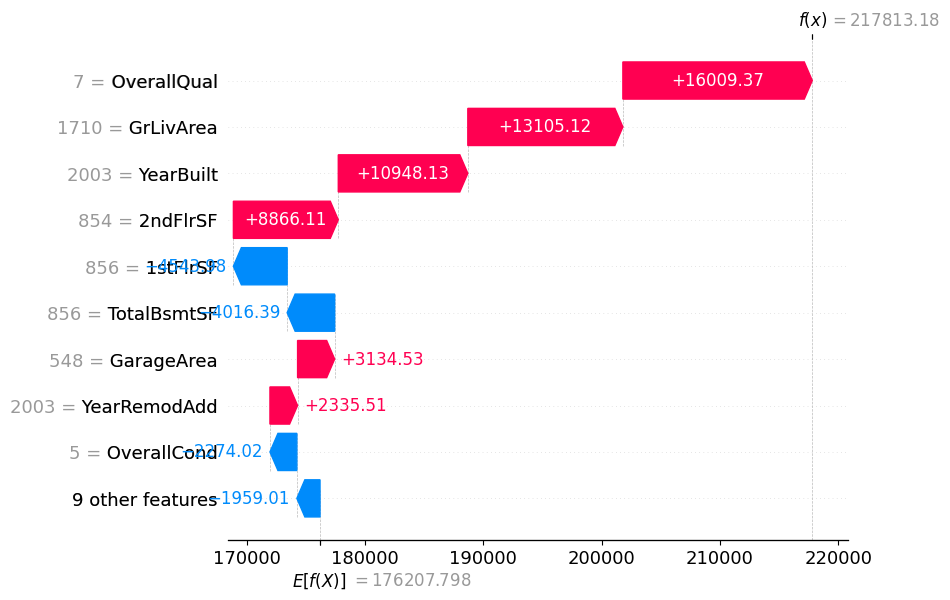

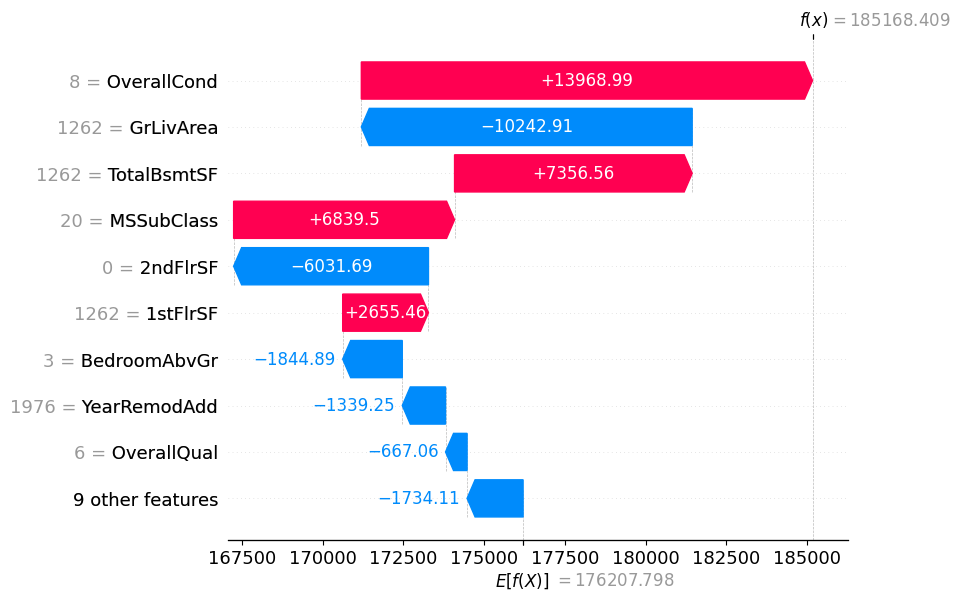

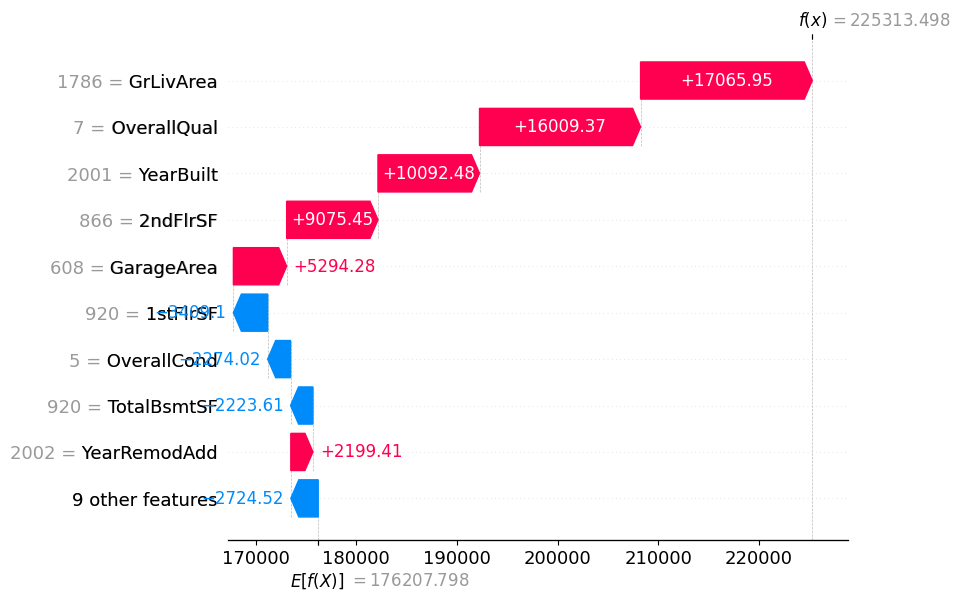

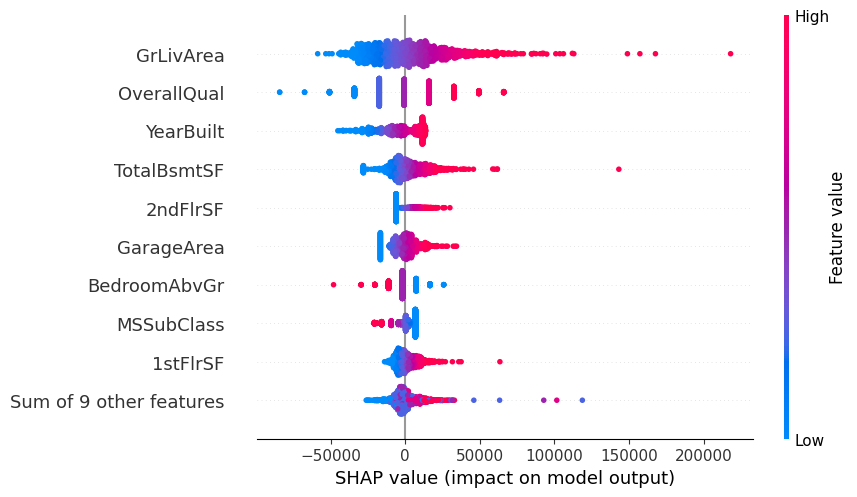

In [57]:
shap.plots.waterfall(shap_values[0]) 
shap.plots.waterfall(shap_values[1]) 
shap.plots.waterfall(shap_values[2]) 
shap.plots.beeswarm(shap_values)

However, using the SHAP method, to get the TRUE value of each feature, we realize that the GrLivArea and OverallQual seem to be influencing house pricing the most. (3 graphs are showcasing the first three test houses). 
While feature influence may vary according to every test houses, it is important to notice some patterns, the beeswarm graph show us that indeed the top 3 features are GrLivArea, OverallQual and YearBuilt.